# Importing Relevant Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [5]:
df = pd.read_csv("Credit Score Classification Dataset.csv")

In [6]:
df.sample(5)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
28,49,Female,65000,Doctorate,Married,1,Owned,High
62,30,Male,117500,Master's Degree,Married,2,Owned,High
136,30,Male,105000,Master's Degree,Married,2,Owned,High
57,49,Female,77500,Doctorate,Married,1,Owned,High
74,32,Male,57500,Associate's Degree,Single,0,Rented,Average


In [7]:
df.shape

(164, 8)

In [8]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [10]:
df.columns.unique()

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

# Dealing with Missing Data

In [12]:
columns = ['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score']
df.columns.duplicated()

array([False, False, False, False, False, False, False, False])

In [9]:
df.isnull().any()

Age                   False
Gender                False
Income                False
Education             False
Marital Status        False
Number of Children    False
Home Ownership        False
Credit Score          False
dtype: bool

In [24]:
df.isnull().values.any()

False

In [11]:
df.columns.nunique()

8

# Dealing with Categorical Data

In [26]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Education', 'Marital Status', 'Home Ownership',
       'Credit Score'],
      dtype='object')

In [29]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [30]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [31]:
df['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [33]:
df['Home Ownership'].unique()

array(['Rented', 'Owned'], dtype=object)

In [35]:
df['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

# Encoding Categorical Variables

In [38]:
objects_dict = {
    'Gender' : ['Female', 'Male'],
    'Education' : ["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"],
    'Marital Status' : ['Single', 'Married'],
    'Home Ownership' : ['Rented', 'Owned'],
    'Credit Score' : ['High', 'Average', 'Low']
}

In [50]:
encoded_df = pd.get_dummies(df[objects_dict])
encoded_df.head(2)

C:\Users\admin\AppData\Local\Temp\ipykernel_4384\1773922217.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  encoded_df = pd.get_dummies(df[objects_dict])


,Gender_Female,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Marital Status_Single,Home Ownership_Owned,Home Ownership_Rented,Credit Score_Average,Credit Score_High,Credit Score_Low
0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,0,0,1,1,0,1,0,0,1,0


In [54]:
encoded_df_scaled = encoded_df.drop(columns=['Gender_Male',"Education_Master's Degree",
                                       'Marital Status_Single','Home Ownership_Rented',
                                       'Credit Score_Low'])
encoded_df_scaled

,Gender_Female,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Marital Status_Married,Home Ownership_Owned,Credit Score_Average,Credit Score_High
0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,1
2,1,0,0,1,0,1,1,0,1
3,0,0,0,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
159,1,0,0,0,1,0,0,0,0
160,0,1,0,0,0,0,0,1,0
161,1,0,1,0,0,1,1,0,1
162,0,0,0,0,0,0,1,0,1


In [61]:
encoded_df_scaled.shape

(164, 9)

In [56]:
df_modified = df.drop(columns=['Gender','Education','Marital Status',
                               'Home Ownership','Credit Score'])
df_modified.head(2)

,Age,Income,Number of Children
0,25,50000,0
1,30,100000,2


In [62]:
df_modified.shape

(164, 3)

In [60]:
df_final = pd.concat([df_modified, encoded_df_scaled],axis=1)
df_final

,Age,Income,Number of Children,Gender_Female,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Marital Status_Married,Home Ownership_Owned,Credit Score_Average,Credit Score_High
0,25,50000,0,1,0,1,0,0,0,0,0,1
1,30,100000,2,0,0,0,0,0,1,1,0,1
2,35,75000,1,1,0,0,1,0,1,1,0,1
3,40,125000,0,0,0,0,0,1,0,1,0,1
4,45,100000,3,1,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
159,29,27500,0,1,0,0,0,1,0,0,0,0
160,34,47500,0,0,1,0,0,0,0,0,1,0
161,39,62500,2,1,0,1,0,0,1,1,0,1
162,44,87500,0,0,0,0,0,0,0,1,0,1


In [63]:
df_final.shape

(164, 12)

# Statistical Summary

In [67]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            164 non-null    int64
 1   Income                         164 non-null    int64
 2   Number of Children             164 non-null    int64
 3   Gender_Female                  164 non-null    uint8
 4   Education_Associate's Degree   164 non-null    uint8
 5   Education_Bachelor's Degree    164 non-null    uint8
 6   Education_Doctorate            164 non-null    uint8
 7   Education_High School Diploma  164 non-null    uint8
 8   Marital Status_Married         164 non-null    uint8
 9   Home Ownership_Owned           164 non-null    uint8
 10  Credit Score_Average           164 non-null    uint8
 11  Credit Score_High              164 non-null    uint8
dtypes: int64(3), uint8(9)
memory usage: 5.4 KB


In [68]:
df_final.describe()

,Age,Income,Number of Children,Gender_Female,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Marital Status_Married,Home Ownership_Owned,Credit Score_Average,Credit Score_High
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439,0.524390,0.152439,0.256098,0.189024,0.182927,0.530488,0.676829,0.219512,0.689024
std,8.477289,32457.306728,0.883346,0.500934,0.360547,0.437813,0.392727,0.387791,0.500598,0.469120,0.415184,0.464311
min,25.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.750000,57500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,83750.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,45.000000,105000.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,53.000000,162500.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking for Outliers

In [148]:
data = df.Income

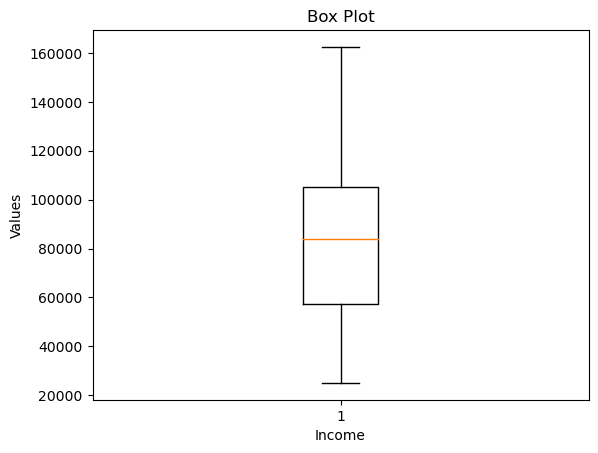

In [23]:
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xlabel('Income')
ax.set_ylabel('Values')
ax.set_title('Box Plot')
plt.show()

In [70]:
df_final.sample(3)

,Age,Income,Number of Children,Gender_Female,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Marital Status_Married,Home Ownership_Owned,Credit Score_Average,Credit Score_High
56,44,87500,0,0,0,0,0,0,0,1,0,1
18,28,30000,0,1,1,0,0,0,0,0,0,0
152,52,130000,0,0,0,0,0,1,1,1,0,1


In [72]:
df_final.shape

(164, 12)

# Training Model

Splitting into Train and Test Data

In [89]:
#Matrix of features or independent variables
x = df_final.loc[:, 'Age':'Home Ownership_Owned'].values

In [85]:
x.shape

(164, 10)

In [88]:
# target variable / dependent variable
y = df_final.loc[:, 'Credit Score_Average':'Credit Score_High'].values

In [87]:
y.shape

(164, 2)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [92]:
x_train.shape

(131, 10)

In [93]:
x_test.shape

(33, 10)

In [94]:
y_train.shape

(131, 2)

In [95]:
y_test.shape

(33, 2)

# Feature scaling 

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [101]:
from sklearn.ensemble import RandomForestClassifier
classifier_rfc = RandomForestClassifier(random_state=0)
classifier_rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

# Model Evaluation

In [102]:
y_pred = classifier_rfc.predict(x_test)

Multi Label Confusion Matrix

In [121]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test, y_pred)
mcm

array([[[27,  1],
        [ 0,  5]],

       [[ 6,  0],
        [ 1, 26]]], dtype=int64)

In [122]:
y_pred[0]

array([0, 1], dtype=uint8)

In [123]:
y_test[0]

array([0, 1], dtype=uint8)

In [143]:
#Comparing test values and predicted values
comparison = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_pred)],axis=1)
comparison.columns = ['y_test(0)', 'y_test(1)', 'y_pred(0)', 'y_pred(1)']
comparison.head()

,y_test(0),y_test(1),y_pred(0),y_pred(1)
0,0,1,0,1
1,0,1,0,1
2,1,0,1,0
3,1,0,1,0
4,0,1,0,1


Model Accuracy

In [146]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.9696969696969697

In [145]:
model_score = classifier_rfc.score(x_test, y_test)
model_score

0.9696969696969697